In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [7]:
palette = ['#003f5c', '#bc5090', '#ffa600', 'darkgoldenrod', 'navy', 'darkmagenta'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Number of stations"
labels = ['1 link', '2 links', '3 links']

In [8]:
data = pd.read_csv('station.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,txBytes,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum
0,407456,1,1,1,1,1.35054,0.000014,0.056113,130.65000,1959566792,1986393888,1282439,1299996,1.01077,1.01077,121.000,121.000,18.5923,71961.7
1,407456,1,2,1,1,7.51413,0.000221,0.277795,61.24110,918572480,993203056,601160,650002,1.00574,1.00574,121.000,121.000,132.9080,166999.0
2,407456,2,2,1,1,6.95167,0.000219,0.267715,61.62100,924158848,993203056,604816,650002,1.01622,1.01622,120.996,120.996,132.4500,161918.0
3,407456,1,1,1,2,1.66185,0.000015,0.060469,130.24100,1953382976,1986393888,1278392,1299996,1.01412,1.01412,121.000,121.000,19.2854,77303.4
4,407456,1,1,1,3,1.83008,0.000015,0.062726,130.01300,1950041240,1986393888,1276205,1299996,1.00915,1.00915,121.000,121.000,19.6634,80051.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,407457,11,15,1,3,47.59020,0.002547,0.382108,4.63166,69404816,132427176,45422,86667,1.03363,1.03363,120.912,120.912,115.7020,17356.1
1076,407457,12,15,1,3,47.46100,0.002547,0.376101,4.64350,69575952,132427176,45534,86667,1.05534,1.05534,120.924,120.924,115.9660,17125.4
1077,407457,13,15,1,3,51.43830,0.002547,0.384726,4.29801,64308936,132427176,42087,86667,1.03095,1.03095,120.731,120.731,107.1960,16192.0
1078,407457,14,15,1,3,49.01170,0.002546,0.379840,4.50279,67522320,132427176,44190,86667,1.02332,1.02332,120.989,120.989,112.5260,16785.1


In [9]:
data = data.groupby(['rngRun', 'nStations', 'linksNumber', 'distance'])\
           .agg({'latency': 'mean', 
                 'loss': 'mean', 
                 'jitter': 'mean', 
                 'throughput': 'sum'})\
           .reset_index()
data

,rngRun,nStations,linksNumber,distance,latency,loss,jitter,throughput
0,407456,1,1,1,0.056113,1.350540,0.000014,130.65000
1,407456,1,2,1,0.060469,1.661850,0.000015,130.24100
2,407456,1,3,1,0.062726,1.830080,0.000015,130.01300
3,407456,2,1,1,0.272755,7.232900,0.000220,122.86210
4,407456,2,2,1,0.298697,7.768670,0.000222,122.15260
...,...,...,...,...,...,...,...,...
130,407458,14,2,1,0.377566,46.781886,0.002367,70.70628
131,407458,14,3,1,0.325848,43.718443,0.002193,74.68588
132,407458,15,1,1,0.373435,47.690667,0.002548,69.44746
133,407458,15,2,1,0.372622,48.157507,0.002545,68.78816


C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\2198552177.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


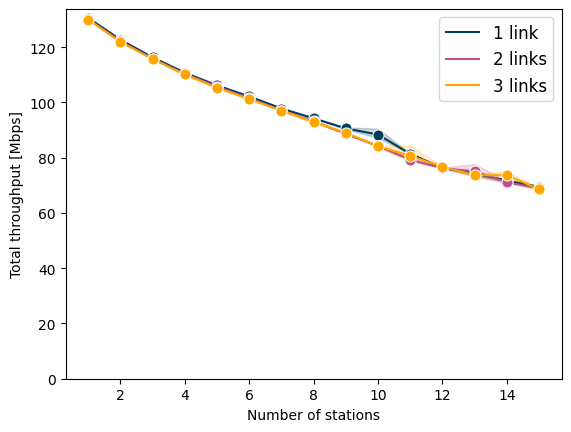

In [10]:
plot_sum = data.groupby(['nStations', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
ax.set_ylim(0)  
plt.savefig('sta_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\256327700.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


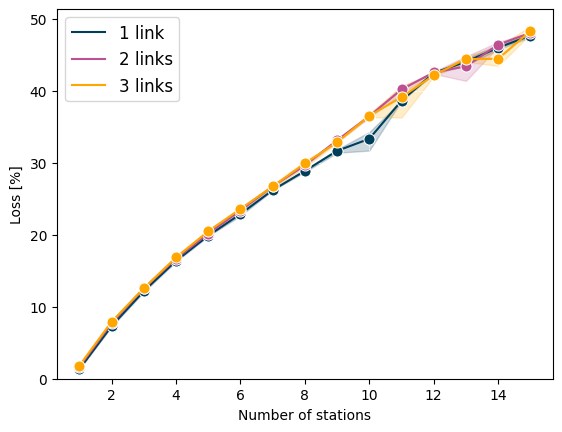

In [11]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Loss [%]')
ax.set_ylim(0)  
plt.savefig('sta_loss.svg', bbox_inches='tight')

In [12]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\1171565398.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


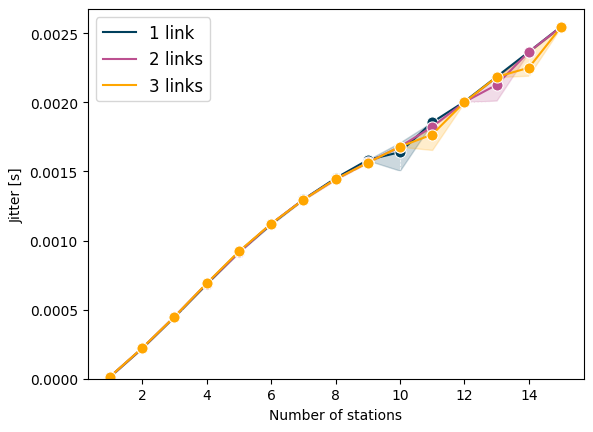

In [13]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Jitter [s]')
ax.set_ylim(0)  
plt.savefig('sta_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\167697691.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


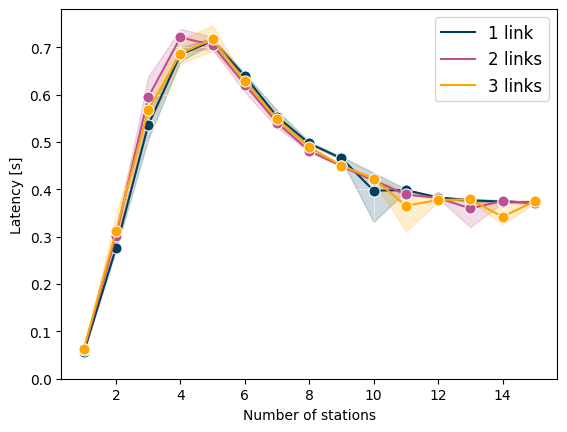

In [14]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0)  
ax.set(xlabel=xlabel, ylabel='Latency [s]')
plt.savefig('sta_lat.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\2836789617.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\2836789617.py:19: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber',


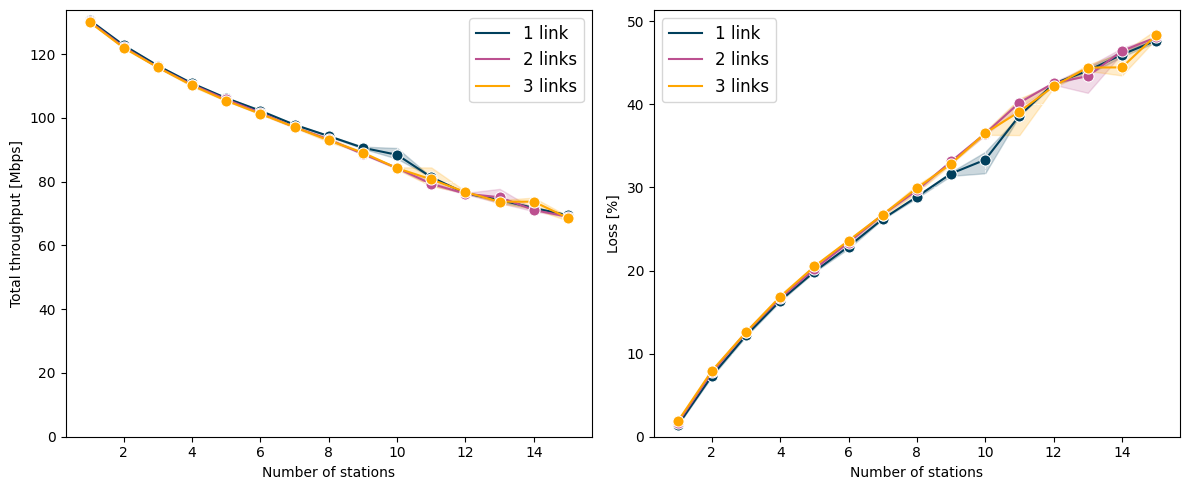

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Throughput
sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='distance')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Loss
sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='distance')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel=xlabel, ylabel='Loss [%]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('sta_thr_loss.svg', bbox_inches='tight')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\1962070765.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_30860\1962070765.py:19: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber',


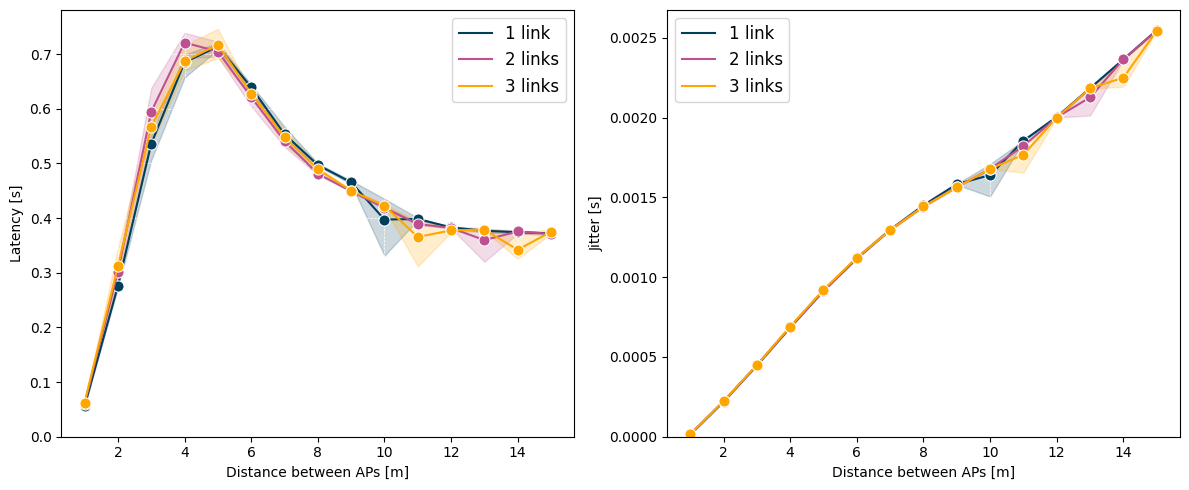

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Latency
sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='distance')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel='Distance between APs [m]', ylabel='Latency [s]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Jitter
sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='distance')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel='Distance between APs [m]', ylabel='Jitter [s]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('sta_lat_jitter.svg', bbox_inches='tight')
plt.show()